In [1]:
import torch
import torch.nn as nn
import lightning as pl



from train_bronze import LightningModel, get_dataset, get_config_for_dataset
from bronze_age.config import Config, DatasetEnum
from torch_geometric.loader import DataLoader

In [ ]:
tree_model = torch.load("lightning_logs/26/03/25 10:21 Infection mlp/CV_1/checkpoints/pruned_decision_tree_model.pt", weights_only=False)

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
input_tree : DecisionTreeClassifier = tree_model.input.tree

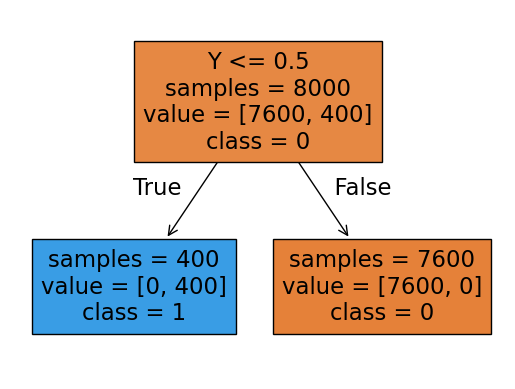

In [21]:
annotations = plot_tree(input_tree, feature_names=["x", "y", "z"], class_names=["0", "1"], filled=True, impurity=False)
for annotation in annotations:
    annotation.set_text(annotation.get_text().replace("x", "X").replace("y", "Y").replace("Z", "z"))


In [27]:
worse_model = """
=====================
Fold 1/10
Train accuracy: 0.8960000276565552
Validation accuracy: 0.8960000276565552
Test accuracy: 0.8960000276565552
=====================
=====================
Fold 2/10
Train accuracy: 0.6980000138282776
Validation accuracy: 0.6980000138282776
Test accuracy: 0.6980000138282776
=====================
=====================
Fold 3/10
Train accuracy: 0.8019999861717224
Validation accuracy: 0.8019999861717224
Test accuracy: 0.8019999861717224
=====================
=====================
Fold 4/10
Train accuracy: 0.6980000138282776
Validation accuracy: 0.6980000138282776
Test accuracy: 0.6980000138282776
=====================
=====================
Fold 5/10
Train accuracy: 0.703000009059906
Validation accuracy: 0.703000009059906
Test accuracy: 0.703000009059906
=====================
=====================
Fold 6/10
Train accuracy: 0.9010000228881836
Validation accuracy: 0.9010000228881836
Test accuracy: 0.9010000228881836
=====================
=====================
Fold 7/10
Train accuracy: 0.9950000047683716
Validation accuracy: 0.9950000047683716
Test accuracy: 0.9950000047683716
=====================
=====================
Fold 8/10
Train accuracy: 0.6980000138282776
Validation accuracy: 0.6980000138282776
Test accuracy: 0.6980000138282776
=====================
=====================
Fold 9/10
Train accuracy: 0.9950000047683716
Validation accuracy: 0.9950000047683716
Test accuracy: 0.9950000047683716
=====================
=====================
Fold 10/10
Train accuracy: 0.8960000276565552
Validation accuracy: 0.8960000276565552
Test accuracy: 0.8960000276565552
=====================
""" 

better_model = """
=====================
Fold 1/10
Train accuracy: 0.8019999861717224
Validation accuracy: 0.8019999861717224
Test accuracy: 0.8019999861717224
=====================
=====================
Fold 2/10
Train accuracy: 1.0
Validation accuracy: 1.0
Test accuracy: 1.0
=====================
=====================
Fold 3/10
Train accuracy: 1.0
Validation accuracy: 1.0
Test accuracy: 1.0
=====================
=====================
Fold 4/10
Train accuracy: 0.6980000138282776
Validation accuracy: 0.6980000138282776
Test accuracy: 0.6980000138282776
=====================
=====================
Fold 5/10
Train accuracy: 0.796999990940094
Validation accuracy: 0.796999990940094
Test accuracy: 0.796999990940094
=====================
=====================
Fold 6/10
Train accuracy: 0.9010000228881836
Validation accuracy: 0.9010000228881836
Test accuracy: 0.9010000228881836
=====================
=====================
Fold 7/10
Train accuracy: 0.8960000276565552
Validation accuracy: 0.8960000276565552
Test accuracy: 0.8960000276565552
=====================
=====================
Fold 8/10
Train accuracy: 0.6980000138282776
Validation accuracy: 0.6980000138282776
Test accuracy: 0.6980000138282776
=====================
=====================
Fold 9/10
Train accuracy: 0.9950000047683716
Validation accuracy: 0.9950000047683716
Test accuracy: 0.9950000047683716
=====================
=====================
Fold 10/10
Train accuracy: 0.9010000228881836
Validation accuracy: 0.9010000228881836
Test accuracy: 0.9010000228881836
=====================
"""

worse_model_test_acc = [0.8960000276565552, 0.6980000138282776, 0.8019999861717224, 0.6980000138282776, 0.703000009059906, 0.9010000228881836, 0.9950000047683716, 0.6980000138282776, 0.9950000047683716, 0.8960000276565552]
better_model_test_acc = [0.8019999861717224, 1.0, 1.0, 0.6980000138282776, 0.796999990940094, 0.9010000228881836, 0.8960000276565552, 0.6980000138282776, 0.9950000047683716, 0.9010000228881836]

In [28]:
len(worse_model_test_acc), len(better_model_test_acc)

(10, 10)

In [24]:
print("Worse model test accuracy:", sum(worse_model_test_acc)/len(worse_model_test_acc))
print("Better model test accuracy:", sum(better_model_test_acc)/len(better_model_test_acc))
# paired t-test
from scipy.stats import ttest_rel
t_statistic, p_value = ttest_rel(worse_model_test_acc, better_model_test_acc)
print("t-statistic:", t_statistic)

Worse model test accuracy: 0.8282000124454498
Better model test accuracy: 0.873333344856898


ValueError: Array shapes are incompatible for broadcasting.